Version2 : Started August 22 - Ended August 24, 2024. 

Saved on August 18, 2024. By Marília Prata, mpwolke.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/commune-in-switzerland/p1_communes.csv


Absolut (diretory/dirname) and Relative paths 

In [2]:
import os
dirname = os.path.dirname('../input/commune-in-switzerland/')
filename = os.path.join(dirname, 'p1_communes.csv')

That will show a string, after that it will be required to read applying (pd.read_csv)

In [3]:
filename

'../input/commune-in-switzerland/p1_communes.csv'

<h1 style="font-size:180%; color:orange;"><i><b>An Overview of the Dataset</b></i></h1>

#A1: Import the data as a Pandas Dataframe and name it as df.

In [4]:
df = pd.read_csv("../input/commune-in-switzerland/p1_communes.csv")
df.head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


#A2: Check the number of rows and columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

Unique values: 26 Cantons ✔️ and 2202 Communes??

According to CH info: The 26 cantons are divided into 2131 communes.

https://www.ch-info.swiss/en/edition-2024/die-schweiz/foederalismus#:~:text=The%2026%20cantons%20are%20divided%20into%202131%20communes.

In [6]:
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 Canton                          26
Commune                       2202
Language                         4
Residents                     1791
Population density per km²    2194
0-19 years                    2131
20-64 years                   2132
65 years or over              2127
Private households            1438
Surface area in km²           1490
Settlement area               2140
Agricultural area             2163
Wooded area                   2166
Unproductive area             1789
East coordinate               1472
North coordinate              1257
Elevation                      934
dtype: int64


#A3: Display the first few Entries of the DataFrame.

In [7]:
df.head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


#A4: Obtain the index labels, and then show the column names as a list.

"The columns method returns an Index object which contains all the column names. It can be converted to a list by using the list constructor or the tolist method."

Source: https://www.aporia.com/resources/how-to/get-list-dataframe-column-names/#:~:text=The%20columns%20method%20returns%20an,constructor%20or%20the%20tolist%20method.

In [8]:
# with list constructor
col_list = list(df.columns)
col_list

['Canton',
 'Commune',
 'Language',
 'Residents',
 'Population density per km²',
 '0-19 years',
 '20-64 years',
 '65 years or over',
 'Private households',
 'Surface area in km²',
 'Settlement area',
 'Agricultural area',
 'Wooded area',
 'Unproductive area',
 'East coordinate',
 'North coordinate',
 'Elevation']

Listing columns is useful to check if there is some space between letters and ticks.

In [9]:
df.columns.tolist()

['Canton',
 'Commune',
 'Language',
 'Residents',
 'Population density per km²',
 '0-19 years',
 '20-64 years',
 '65 years or over',
 'Private households',
 'Surface area in km²',
 'Settlement area',
 'Agricultural area',
 'Wooded area',
 'Unproductive area',
 'East coordinate',
 'North coordinate',
 'Elevation']

#A5: Check the data type for each column.  Attribute dtypes

In [10]:
df.dtypes

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

#A6: Missing Values 

Instead of line:  df.isnull().sum()

Show the rows with missing and their respectives Nan: 

df[df.isna().any(axis=1)] 

In [11]:
#Show the rows that contain the missing values. 

df[df.isna().any(axis=1)]

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


#Mapping to fill Canton Nans with their respective Communes

Mapping will help me to deal with B4. Since Nan is float. 

Dealing with Nan avoiding "TypeError: unsupported operand type(s) for +: 'float' and 'str'"

Apply Mapping to remove the Nan on the Canton column.

In [12]:
#By Jocelyn Dumlao https://www.kaggle.com/discussions/questions-and-answers/529998#2968648

# Dictionary mapping Communes to their corresponding Cantons
commune_to_canton = {
     'Thurnen': 'BE',
     'Villaz': 'FR',
     'Prez': 'FR'
 }

# Replace missing values in the 'State' column based on the 'City' column
df['Canton'] = df.apply(lambda row: commune_to_canton[row['Commune']] if pd.isnull(row['Canton']) else 
row['Canton'], axis=1)

# Display the updated DataFrame
#print(df)

Check the Canton column without Nan! And their respective Communes.

In [13]:
#Now, check the Canton without Nan! Only Language has Nan

df[df.isna().any(axis=1)]

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,BE,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,FR,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,FR,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


#A7: Remove any observations to ensure that there are NO Missing Values. 

"You shouldn't impute data without a source or without using a sound **Statistical procedure** for the task." 

Therefore, avoid the simple: df.fillna(value=0,inplace=True)

In [14]:
#Apply SimpleImputer on the Missing values

from sklearn.impute import SimpleImputer
df_most_frequent = df.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df_most_frequent.iloc[:,:] = mean_imputer.fit_transform(df_most_frequent)

In [15]:
df_most_frequent.isnull().sum()

Canton                        0
Commune                       0
Language                      0
Residents                     0
Population density per km²    0
0-19 years                    0
20-64 years                   0
65 years or over              0
Private households            0
Surface area in km²           0
Settlement area               0
Agricultural area             0
Wooded area                   0
Unproductive area             0
East coordinate               0
North coordinate              0
Elevation                     0
dtype: int64

<h1 style="font-size:180%; color:orange;"><i><b>Exploration: numerical summaries, indexing and grouping </b></i></h1>

#B1: Obtain the Mean, Minimum and Maximum value for each Column.

Method df.describe().loc[['mean','min','max']].T

Your output should preferably **show Only the three requested statistics** and not the full table of descriptive statistics.

In [16]:
#Describe showing Only the requested statistics (mean, minimum and maximum). Then, transpose the table.

df.describe().loc[['mean','min','max']].T

,mean,min,max
Residents,3.880348e+03,1.100000e+01,4.153670e+05
Population density per km²,4.324452e+02,8.950366e-01,1.266905e+04
0-19 years,2.058566e+01,0.000000e+00,3.777778e+01
20-64 years,6.036646e+01,1.818182e+01,7.792208e+01
65 years or over,1.904788e+01,6.271186e+00,8.181818e+01
Private households,1.708607e+03,1.000000e+01,2.012520e+05
Surface area in km²,1.815912e+01,3.100000e-01,4.386300e+02
Settlement area,1.485533e+01,1.388969e-01,9.726027e+01
Agricultural area,4.593986e+01,0.000000e+00,9.150943e+01
Wooded area,3.256484e+01,0.000000e+00,8.823529e+01


#B2: Ten Most Populated Communes

LIST the 10 MOST POPULATED COMMUNES, ordered by their NUMBER of RESIDENTS.

In [17]:
# Sort data by Residents in descending order 
most_populated = df.sort_values(by='Residents', ascending=False) 

# Display the 10 most populated communes 
most_populated.head(10)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
154,ZH,Zürich,de,415367,4723.837143,17.388719,67.684241,14.927040,201252,87.93,61.972472,10.101240,26.231373,1.694915,2683100,1247100,457
2124,GE,Genève,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
910,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
1749,VD,Lausanne,fr,139111,3361.793137,19.569984,65.735995,14.694021,68940,41.38,44.694223,16.050278,39.062122,0.193377,2538200,1152400,667
194,BE,Bern,de,133883,2593.626501,16.693680,66.047220,17.259099,63414,51.62,45.030033,18.988568,33.617516,2.363883,2600100,1199700,556
141,ZH,Winterthur,de,111851,1643.176142,19.862138,63.889460,16.248402,50776,68.07,33.587786,24.823840,40.443335,1.145038,2697200,1261700,481
535,LU,Luzern,de,81691,2807.250859,16.127848,64.419581,19.452571,41139,29.10,47.815617,27.863777,22.325421,1.995184,2666200,1211800,490
1053,SG,St. Gallen,de,75833,1925.672930,18.076563,64.303140,17.620297,36992,39.38,40.808543,28.960081,28.451564,1.779812,2746200,1254600,688
1582,TI,Lugano,it,63185,832.915898,17.450344,60.397246,22.152410,30755,75.93,18.662806,9.607792,66.122664,5.606739,2717100,1095900,789
207,BE,Biel/Bienne,de,55159,2603.067485,19.362207,62.337968,18.299824,26339,21.19,45.518868,7.877358,45.377358,1.226415,2585500,1221200,478


#B3:Ten Least Populated Communes

LIST the 10 LEAST POPULATED COMMUNES, ordered by their NUMBER of RESIDENTS.

In [18]:
# Sort data by Residents in descending order 
least_populated = df.sort_values(by='Residents', ascending=True) 

# Display the 10 most populated communes 
least_populated.head(10)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1546,TI,Corippo,it,11,1.426719,0.000000,18.181818,81.818182,10,7.71,0.259740,3.506494,64.935065,31.298701,2708100,1121500,1134
875,SO,Kammersrohr,de,28,29.473684,10.714286,67.857143,21.428571,12,0.95,3.191489,56.382979,40.425532,0.000000,2611700,1233700,618
2011,VS,Bister,de,33,5.679862,9.090909,60.606061,30.303030,16,5.81,1.206897,15.862069,42.586207,40.344828,2648200,1134500,1777
366,BE,Schelten,de,36,6.474820,22.222222,63.888889,13.888889,13,5.56,1.985560,38.628159,59.205776,0.180505,2608500,1242500,907
370,BE,Rebévelier,de,41,11.549296,29.268293,46.341463,24.390244,16,3.55,0.564972,59.887006,39.548023,0.000000,2580000,1237500,990
485,BE,Berken,de,45,32.374101,11.111111,62.222222,26.666667,21,1.39,11.428571,52.857143,30.000000,5.714286,2620500,1230500,441
1629,TI,Cerentino,it,45,2.238806,13.333333,53.333333,33.333333,26,20.10,1.343284,4.975124,71.741294,21.940299,2685300,1128800,1498
1160,GR,Lohn (GR),rm,46,5.630355,13.043478,63.043478,23.913043,19,8.17,1.105651,57.371007,34.275184,7.248157,2752200,1168600,1760
342,BE,Clavaleyres,de,46,46.000000,13.043478,58.695652,28.260870,17,1.00,5.000000,80.000000,15.000000,0.000000,2573500,1194200,466
1627,TI,Bosco/Gurin,it,46,2.089959,8.695652,60.869565,30.434783,25,22.01,0.635786,24.386921,30.881017,44.096276,2681100,1130000,2019


#B4: Save into separate csv files: ZH.csv 

Group the communes by canton and save them into separate .csv files, e.g. a ZH.csv with all the data for communes in Zurich (Do not include the .csv files in your submission).

In [19]:
for ZH in df.Canton.unique():
    df[df.Canton == ZH].to_csv(ZH+'.csv')

#B5: Compute the population density at the canton level. 

Rank the cantons from **most dense** to **least dense.**

In [20]:
df_total=df[["Residents", "Surface area in km²", "Canton"]].groupby(['Canton']).sum()
df_total["Population density"]=df_total["Residents"]/df_total["Surface area in km²"]
df_total.sort_values(by=['Population density'], ascending=False)

,Residents,Surface area in km²,Population density
Canton,,,
BS,194766,36.95,5271.069012
GE,499480,245.82,2031.893255
ZH,1520968,1660.84,915.782375
ZG,126837,207.16,612.265881
BL,288132,517.67,556.593969
AG,678207,1395.07,486.145498
SO,273194,790.45,345.618319
TG,276472,863.11,320.320701
LU,409557,1429.13,286.577848


Most Dense Cantons

Basel at on top: Pop density 5271.069012. Basel Stats from 2021, seems it has increased comparing with the data above.

Population (July 2021)
 • Total: 201,156
 • Density: 5,400/km2 (14,000/sq mi)

Canton of Zürich (ZH) with a population of 1,553,423 (as of 31 December 2020), it is the most populous canton of Switzerland.

https://en.wikipedia.org/wiki/Canton_of_Zurich#cite_note-Stat2020_ZH-4

Canton of Zürich (ZH):
Population (December 2020)
 • Total: 1,553,423
 • Density: 900/km2 (2,300/sq mi)
 https://en.wikipedia.org/wiki/Canon_of_Zurich

**Least Dense Cantons**

According to the least_dense, Canton of Grisons (Population density per km²: 27.919509).The population of the canton (as of 31 December 2020) is 200,096
seems to be increasing if we compare with the Wikipedia/Eurostat information from 2019.

Canton of Grisons (GR):

Population: 198,379 (2019) Eurostat

Area: 7,105 km²

https://en.wikipedia.org/wiki/Grisons

#B6: Communes in each Canton where more than 50 percent aged: 20-64 

Compute the number of communes in each canton where more than 50 percent of their populations are aged between 20 and 64 years old.

In [21]:
df[df['20-64 years'] > 50].groupby('Canton')['20-64 years'].count().sort_values()

Canton
BS      3
GL      3
AI      6
OW      7
NW     11
ZG     11
UR     20
AR     20
SH     26
SZ     29
NE     31
GE     45
JU     53
SG     77
TG     80
LU     82
BL     86
GR    102
SO    109
TI    114
VS    124
FR    133
ZH    162
AG    210
VD    309
BE    340
Name: 20-64 years, dtype: int64

Population density is directly proportional to the increase of the number of Residents and inversely proportional to the Surface area.

From that table above, it seems that Basel (BS Canton) has the higher density. Meanwhile, Grisons (GR Canton) occupies the 26th position on Population Density.

#B7: Difference Max/Min Elevations each Canton

Compute the difference between the maximum and minimum elevations for each canton. Find the top 5 cantons that have the largest range of elevations.

In [22]:
 df.groupby('Canton')['Elevation'].agg(lambda x : max(x) - min(x)).sort_values(ascending=False).head(5)

Canton
VS    2610
TI    2044
BE    2025
GR    2017
UR    1871
Name: Elevation, dtype: int64

<h1 style="font-size:180%; color:orange;"><i><b>Exploration: Visualizations</b></i></h1>

Top 10 Populated communes (Stacked Bar chart)

Horizontal Bar plot: The top 10 populated communes.

Your task is to obtain a horizontal bar plot that shows the top 10 populated communes. Your bar chart should have the names of the communes listed vertically along the y-axis and the x-axis should show the populations. Ensure that the chart has an appropriate title and labels.

In [23]:
top10= df.sort_values(by=['Residents'], ascending=False).head(10)

#C2: Horizontal Stacked Bar chart

Plot a horizontal stacked bar chart that shows how The Top 10 Densely Populated Communes lands are divided into the 4 Area types: Settlement, Agricultural, Wooded and Unproductive areas.

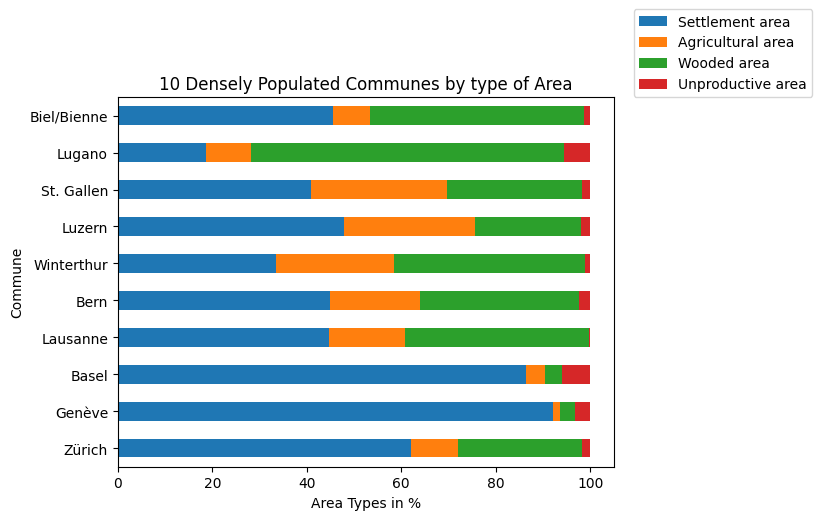

In [24]:
#Plotted first cause I'll reset index to Commune on the barplot
#Otherwise, it would return: Commune Not on the list, Commune after reset is the Index 

top10[['Settlement area', 'Agricultural area','Wooded area','Unproductive area', 'Commune']].plot.barh(x='Commune',stacked=True)

plt.legend(loc=(1.04, 1))#StackOverFlow

# plot a horizontal stacked bar chart
#df.plot.barh(stacked=True)
plt.xlabel("Area Types in %")
plt.title('10 Densely Populated Communes by type of Area');


OBSERVATIONS: 

* Settlement area (blue) occupies most part of the bars. As expected on densely areas.

* Agricultural area (orange), due to the large density of this Top Communes, those orange sub-bars represent small parts of the bars. 

No matter, one-third of Switzerland's land is devoted to agricultural production and pasture (Source https://www.britannica.com/place/Switzerland/Agriculture-and-forestry)

* Wooded area (green), another small sub-bars, except in Onex. 

In Onex, 12.1% of the total land area is heavily forested (https://en.wikipedia.org/wiki/Onex,_Switzerland) 

According to https://www.vogelwarte.ch/ Woodland (including shrub forest) covers about one third of the area of Switzerland. 

* Unproductive area (red) it seems the size of the respectives sub-bars are insignificant or literally inexistent since their values were 0.000000 (Null on Massagno, Renens(VD), Chêne-Bourg and Prilly.

In [25]:
top10.head(3)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
154,ZH,Zürich,de,415367,4723.837143,17.388719,67.684241,14.927040,201252,87.93,61.972472,10.101240,26.231373,1.694915,2683100,1247100,457
2124,GE,Genève,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
910,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266


#C1: Horizontal Bar plot: The top 10 populated communes.

I inverted the tasks order cause reset the index for the bar plot caused an error. Therefore C2 (stacked bar chart) was delivered above. 

**Invert the y-axis** so that the **most densely populated** is displayed **at the top**

In [26]:
#Reset top10 index to Commune, otherwise our barplot will have numbers on y-axis.

top10.set_index("Commune", inplace=True)

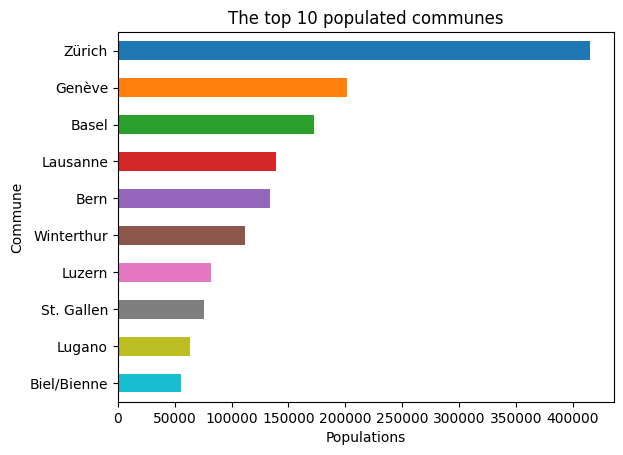

In [27]:
#The first 10 rows, and from these rows, we are interested in the values of the column 'Residents'
values = top10["Residents"]
colormap = plt.cm.tab10(range(0, len(values)))
bar_plot = values.plot.barh(color=colormap)

# Add titles, labels, invert y-axis

bar_plot.set_title("The top 10 populated communes")
bar_plot.set_xlabel("Populations")

#Invert the axis to have the descending order
bar_plot.invert_yaxis()
plt.show(bar_plot)

In [28]:
#Save for Next time

#StackOverflow plt legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
#Answered by ImportanceOfBeingErnest answered Apr 16, 2017 at 16:04

# create a dataframe
#data = {'Commune': ["Genève", "Massagno", "Carouge (GE)", "Vevey","Basel","Renens (VD)","Lancy", "Chêne-Bourg","Onex","Prilly"],
        #'Settlement area': [92.133417,97.260274,84.905660,89.873418,86.521557, 94.237288, 88.016529, 88.095238, 77.304965,82.191781],
        #'Agricultural area': [1.510384, 0.000000, 4.905660, 2.953586, 3.850984, 3.389831, 5.165289, 8.730159, 6.028369, 10.958904],
        #'Wooded area': [3.146633, 2.739726, 8.679245, 4.641350,3.641691,2.372881, 6.404959, 3.174603, 13.120567, 6.849315],
        #'Unproductive area': [3.209566, 0.000000, 1.509434, 2.531646, 5.985768,0.000000, 0.413223, 0.000000, 3.546099, 0.000000]} 
#df = pd.DataFrame(data)
#df = df.set_index('Commune')
#df

# plot a horizontal stacked bar chart
#df.plot.barh(stacked=True)
#plt.xlabel("Area Types in %")
#plt.title('10 Densely Populated Communes by type of Area')

#plt.legend(loc=(1.04, 1))#StackOverFlow

#plt.show()

In [29]:
df1 = pd.read_csv("../input/commune-in-switzerland/p1_communes.csv")
df1.head(2)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.56890,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.76865,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502


In [30]:
#Make sure that the index is properly defined

#df1.set_index("Commune", inplace=True) 

#C3: Histogram of Young Residents (0-19 yrs)

Obtain a Histogram that shows the number of communes for which the proportion of young residents (0-19 years) falls into the intervals.

Pyplot: using percentage on x axis

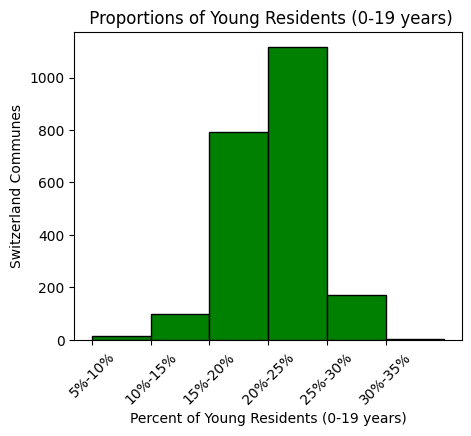

In [31]:
##Answered by Jocelyn Dumlao https://www.kaggle.com/discussions/questions-and-answers/529789#2967862

#StackOverflow https://stackoverflow.com/questions/26294360/pyplot-using-percentage-on-x-axis
#Answered by Ffisegydd Oct 10, 2014 at 8:14

import matplotlib.ticker as mtick
fig = plt.figure(1, (5,4))
ax = fig.add_subplot(1,1,1)

# Convert proportions to percentages
#df1['0-19 years'] = df1['0-19 years'] * 100

bins = [5, 10, 15, 20, 25, 30, 35]
labels = ['5%-10%', '10%-15%', '15%-20%', '20%-25%', '25%-30%', '30%-35%']

from matplotlib.ticker import PercentFormatter #Added 00

ax.xaxis.set_major_formatter(mtick.PercentFormatter())

hist = df1["0-19 years"].plot.hist(bins=bins, color="green", edgecolor="black")
hist.set_xlabel("Percent of Young Residents (0-19 years)")
hist.set_ylabel("Switzerland Communes")
hist.set_title(" Proportions of Young Residents (0-19 years)")

# Labeling the x-axis with percentage intervals
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticks(bins[:-1])  # Exclude the last bin edge for tick positions
ax.set_xticklabels(labels, rotation=45)

plt.xticks(rotation=45)

plt.show()

C4: Violin plot: Spoken languages by the young population

A violin plot of the young residents population (0-19 yrs) and the spoken languages. 

Deutsch (german) is the most spoken and the least Romansh. The Zero corresponds to the "Canton Zero" (fillna missing values). 

According to https://www.eda.admin.ch/ Languages and dialects:

"The four official national languages – German, French, Italian, and Romansh – are spoken in dialects that often differ significantly from their written counterparts." 
https://www.eda.admin.ch/aboutswitzerland/en/home/gesellschaft/sprachen/sprachen-und-dialekte.html

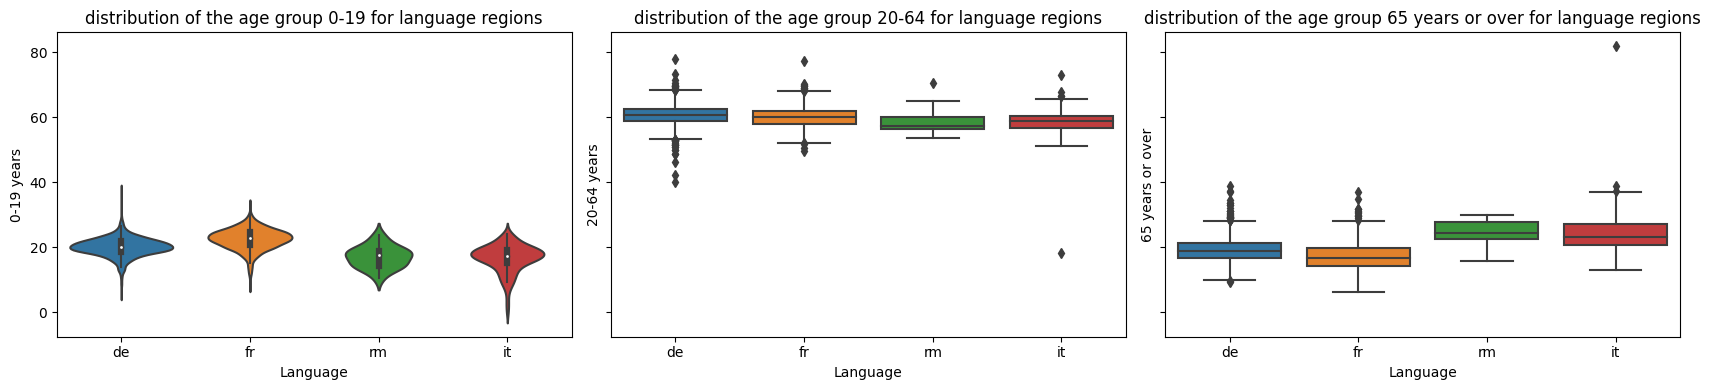

In [32]:
#By Daniel Flores Agreda since I delivered a single violin instead of subplots

fig, axes = plt.subplots(nrows = 1,
                         ncols = 3,
                         figsize = (17, 4), sharey=True)   

sns.violinplot(x="Language", y="0-19 years",   data=df1, ax=axes[0])
sns.boxplot(x="Language", y="20-64 years",     data=df1, ax=axes[1])
sns.boxplot(x="Language", y="65 years or over",data=df1, ax=axes[2])

axes[0].set_title('distribution of the age group 0-19 for language regions')
axes[1].set_title('distribution of the age group 20-64 for language regions')
axes[2].set_title('distribution of the age group 65 years or over for language regions')

fig.tight_layout()
plt.show()

#C5: Strip plot Subplots age groups 0-19 years, 20-64 years and 65 years or over.

Task for the three age groups 0-19 years, 20-64 years, and 65 years or over. In order to make the comparison easy, you should make a plot with one subplot per age group (plot with 1 row and 3 columns). Ensure that the subplots have appropriate titles, legends, and labels. Also, ensure that they have proper sizes and there is enough space between them.

I tried though I couldn't add the percent symbol this time.

Population 20-64 years represents the higher proportion (50% till 80%) on both Strip plot and Box plot.

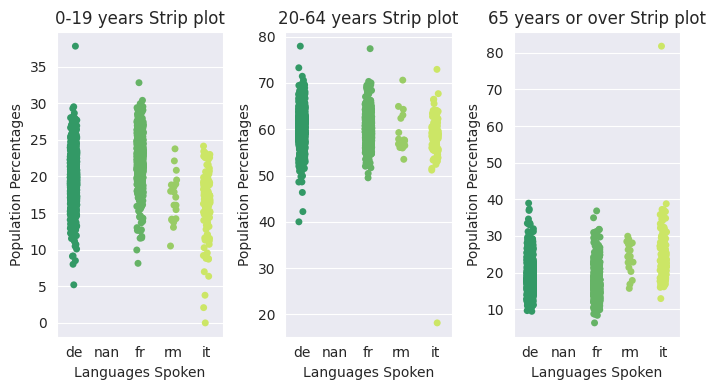

In [33]:
#Creating a stripplot to visualize differences in data distribution between languages spoken

import matplotlib.ticker as mtick

#Unfortunately, No percent symbol was addde to y-axis

ax.yaxis.set_major_formatter(mtick.PercentFormatter(5.0))



features = ['0-19 years', '20-64 years', '65 years or over']

n = 1

sns.set_style('darkgrid')
plt.figure(figsize = (7, 4))

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)


for feature in features:
    plt.subplot(1,3,n)
    sns.stripplot(x = df1['Language'], y = df1[feature], palette = 'summer').set(xlabel = None, ylabel = None)
    plt.ylabel('Population Percentages')
    plt.xlabel('Languages Spoken')
    plt.title(f'{feature} Strip plot')
    n = n + 1
    plt.tight_layout()

In [34]:
#By Fatih Bilgin https://www.kaggle.com/code/fatihbilgin/quick-eda-and-data-visualization-for-beginners

import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

trace1 = go.Box(
    y=df1["0-19 years"],
    name = 'Population 0-19 years',
    marker = dict(color = 'rgb(255,111,145)')
)

trace2 = go.Box(
    y=df1["20-64 years"],
    name = 'Population 20-64 years',
    marker = dict(color = 'rgb(132,94,194)')
)

trace3 = go.Box(
    y=df1["65 years or over"],
    name = 'Population 65 years or over',
    marker = dict(color = 'rgb(255,111,145)')
)

data = [trace1, trace2, trace3]
layout = dict(autosize=False, width=700,height=500, title='Communes Population 0-65 or over yrs.', paper_bgcolor='rgb(243, 243, 243)', 
              plot_bgcolor='rgb(243, 243, 243)', margin=dict(l=40,r=30,b=80,t=100,))

fig = dict(data=data, layout=layout)
iplot(fig)

#C6: Three Pairplots

Produce 3 plots to visually investigate the relation between the Agricultural area of communes and their Settlement area, Wooded area and the Unproductive area.

**First pairplot**, Agricultural and Settlement areas. It seems linear, almost a slope.
Densely populated areas where the Elevation is maximum 500.

Source for the future: https://stats.stackexchange.com/questions/636112/how-to-interpret-pairplots

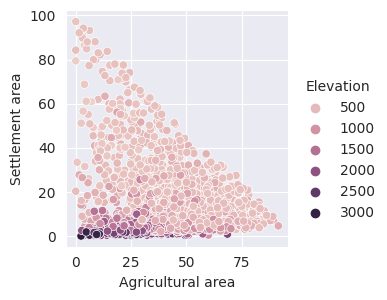

In [35]:
#Relation between the Agricultural area of communes and their Settlement area

sns.pairplot(df1, x_vars=["Agricultural area"], 
                   y_vars=["Settlement area"], 
                   hue="Elevation", 
                   height=3)

plt.show()

**Second Pairplot**: Wooded and Unproductive areas.

Second Pairplot, as we can notice, the higher the Elevation, directly increases the unproductive areas.
It also seems a linear relationship.

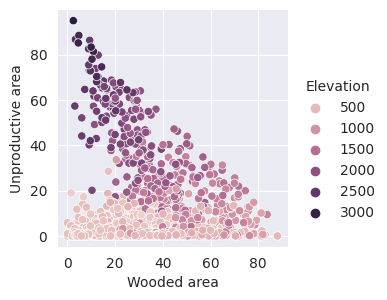

In [36]:
sns.pairplot(df1, x_vars=["Wooded area"], 
                   y_vars=["Unproductive area"], 
                   hue="Elevation", 
                   height=3)
plt.show()

Communes that are **located in high altitudes**  to plot the **third Pairplot**.

In [37]:
#Select all the Elevations that are over 2000m. The Boolean condition is then 'Elevation' > 2000. 

#df["Elevation"] > 2000

df1[df1["Elevation"] > 2000].head(2)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
291,BE,Kandersteg,de,1298,9.663490,13.713405,59.553159,26.733436,669,134.33,0.990763,13.282181,11.814660,73.912396,2618100,1149300,2317
299,BE,Grindelwald,de,3802,22.191093,15.675960,61.678064,22.645976,1922,171.28,1.791759,28.989144,16.359286,52.859811,2645700,1163900,2092


In [38]:
#elev: Communes where elevation is higher than 2000

elev = df1[df1["Elevation"] > 2000]


**Third Pairplot**

There seems to be very little correlation between Settlement, Agricultural and Unproductive areas.
I can Not see linearity  among these features. (No straight lines).

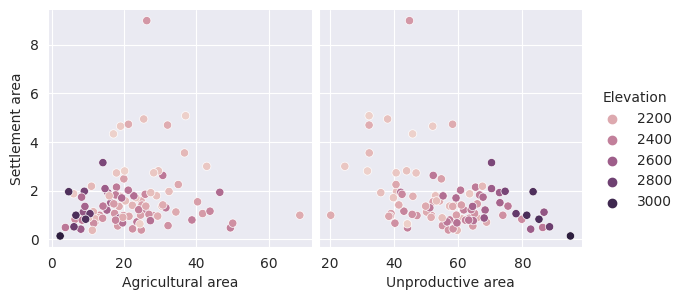

In [39]:
#Third Pair plot

sns.pairplot(elev, x_vars=["Agricultural area", "Unproductive area"], 
                   y_vars=["Settlement area"], 
                   hue="Elevation", 
                   height=3)
plt.show()

#C7: Switzerland Maps

Map of Switzerland using the East and North coordinates of communes. We can see the three geographic regions, namely the Swiss Alps, the Central Plateau and the Jura.

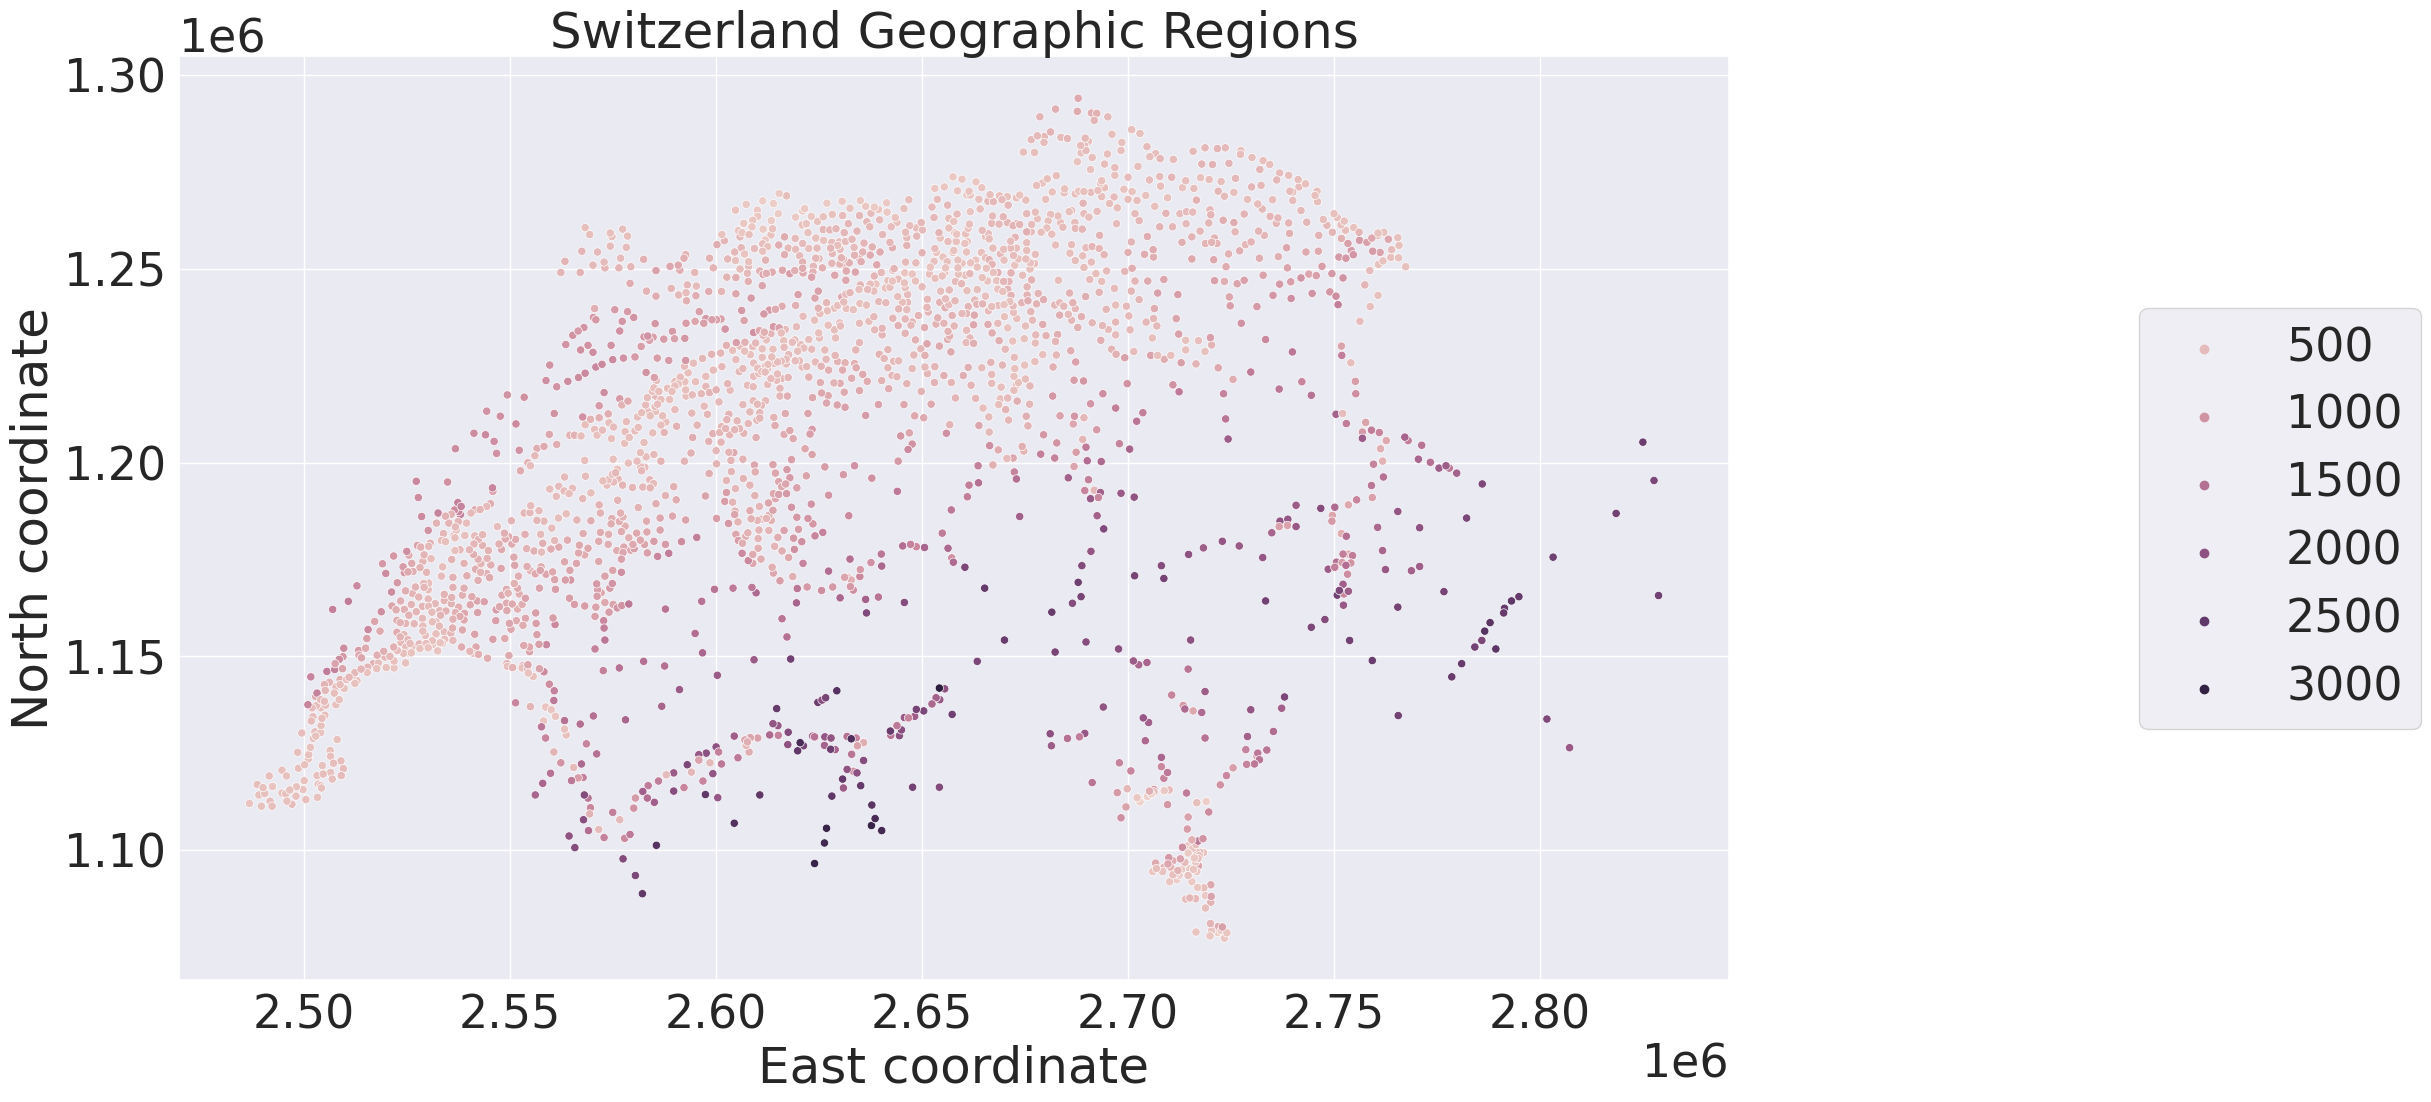

In [40]:
#By Marília Prata on Kaggle https://www.kaggle.com/code/mpwolke/airports-maps
#StackOverFlow https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid

sns.set(font_scale=3) 

plt.figure(figsize=(20,12))
ax = plt.gca()
ax.set_title("Switzerland Geographic Regions")

g = sns.scatterplot(x='East coordinate', y='North coordinate', data=df1, hue='Elevation')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

On the map by Elevation, we can see a concentration at the North of the country where altitude is lower.

Below, it's remarkable the Deutch (German) Language spoken mostly on the North. French spoken (near Lake Genève) on the left and near of the French boarder. And respectively, italian language near Italy (Italy–Switzerland border).

The Zero/Null language is a consequence of the fillna (Prez, Villaz und Thurnen Communes).

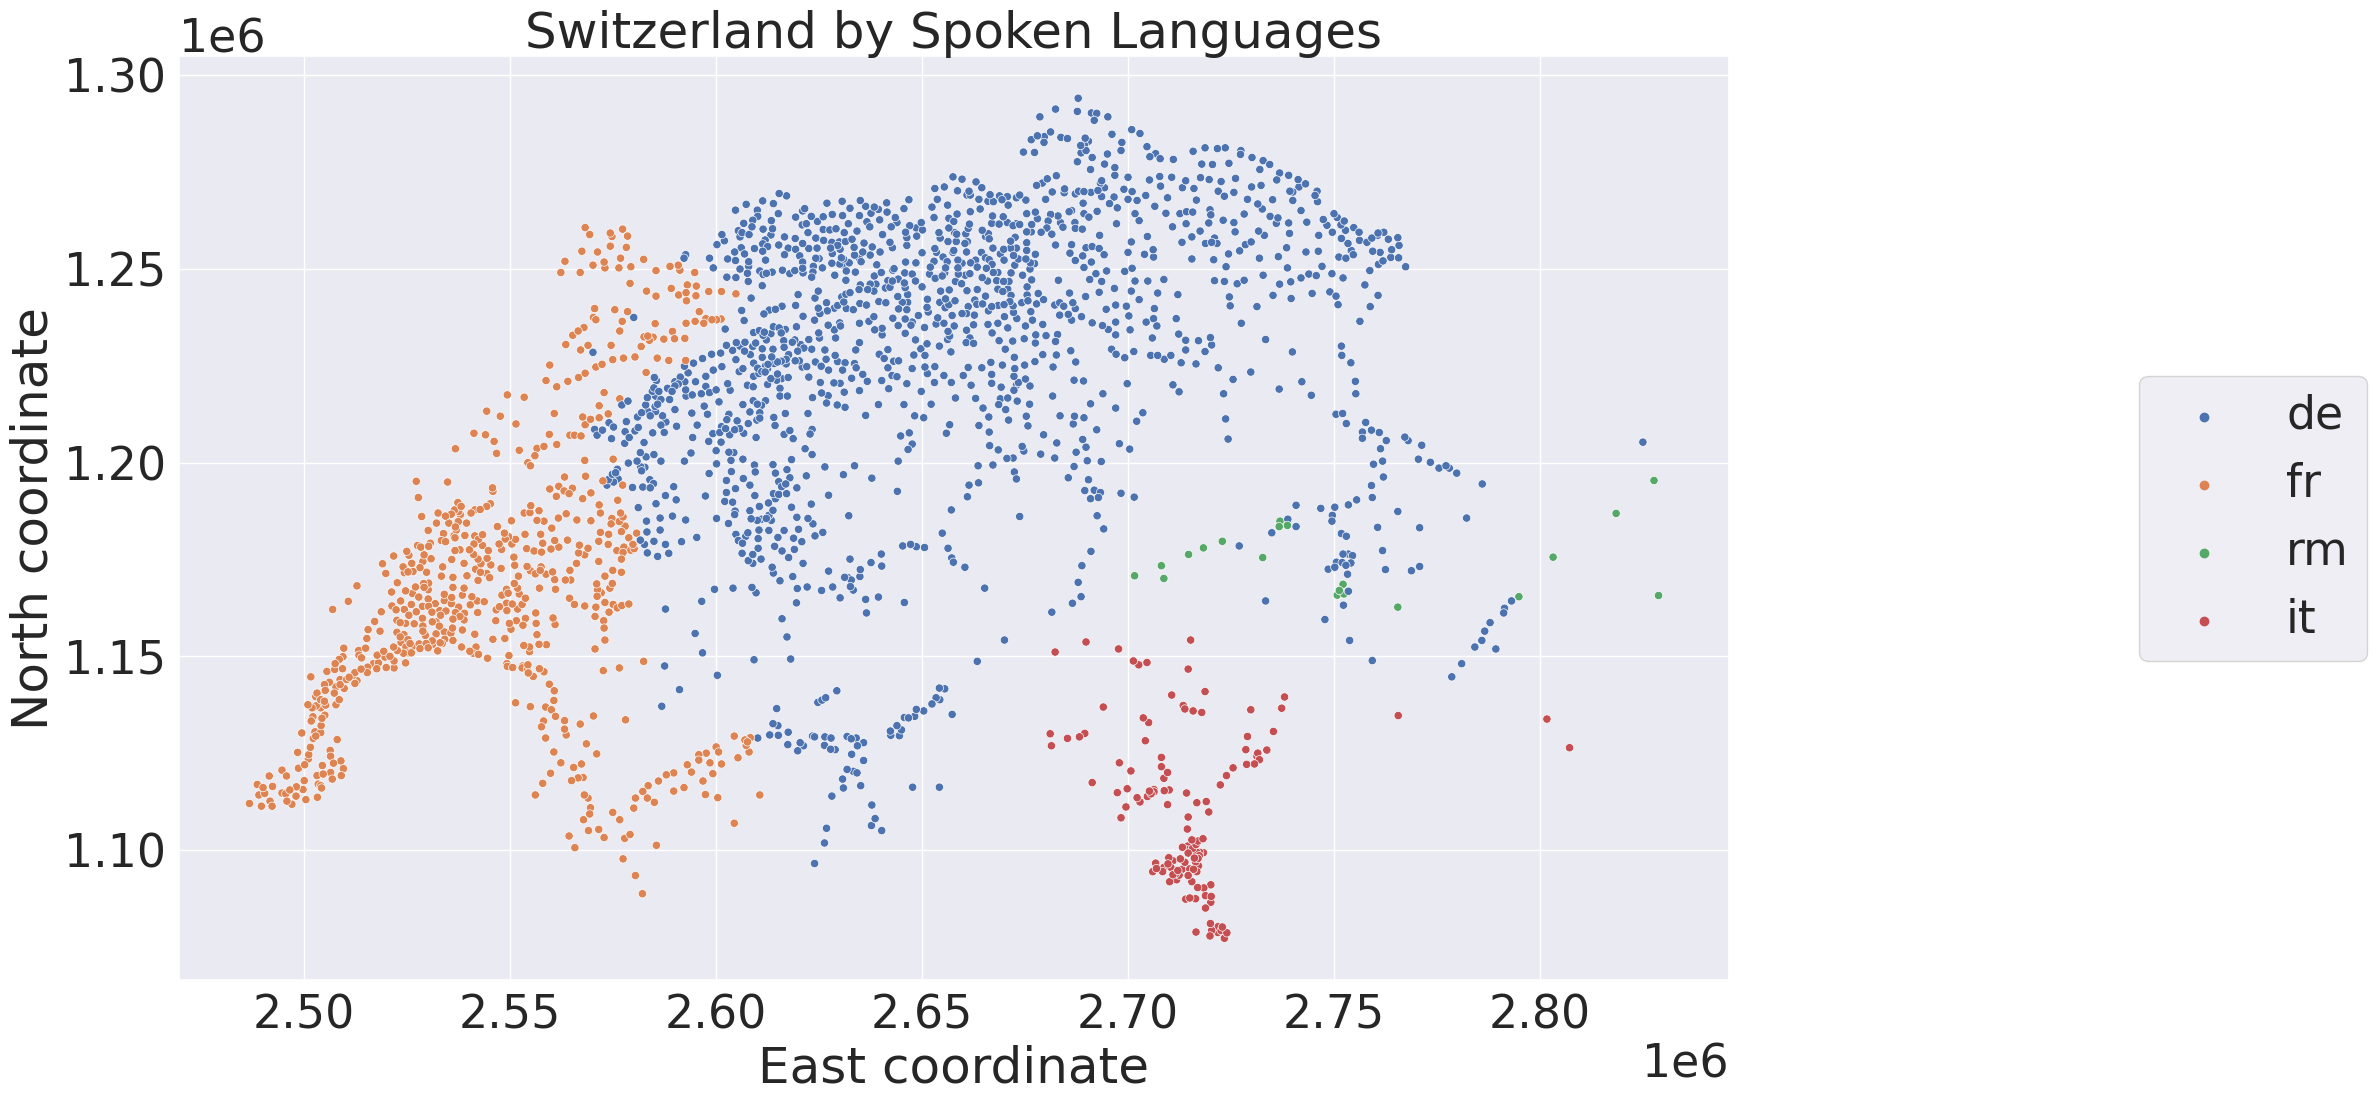

In [41]:
#By Marília Prata on Kaggle https://www.kaggle.com/code/mpwolke/airports-maps
#StackOverFlow https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid

sns.set(font_scale=3) 

plt.figure(figsize=(20,12))
ax = plt.gca()
ax.set_title("Switzerland by Spoken Languages")

g = sns.scatterplot(x='East coordinate', y='North coordinate', data=df1, hue='Language')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

**Switzerland Map subplots**

Two plots from the previous task as subplots (with 1 row and 2 columns). 

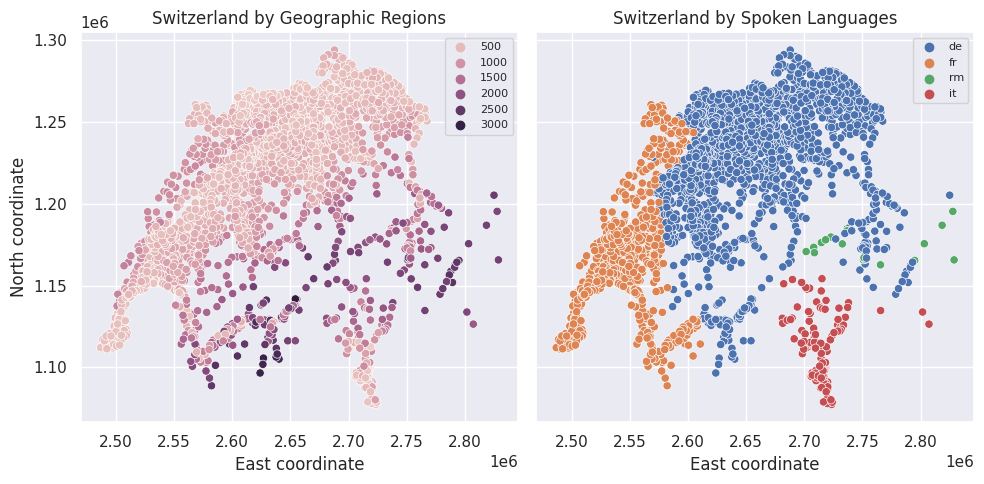

In [42]:
sns.set(font_scale=1)

fig, axes = plt.subplots(nrows = 1, # sets the number of rows in the subplot grid
                         ncols = 2, # sets the number of columns in the subplot grid
                         figsize = (10, 5), # sets the width and height of the figure (in inches)
                         sharey=True) # let the two plots share the same y-axis

# the left-hand side scatter plot
sns.scatterplot(data=df1, x="East coordinate", y="North coordinate", hue='Elevation', 
                ax=axes[0])   # draw the plot on the first axes


axes[0].set_title('Switzerland by Geographic Regions')
axes[0].legend(loc='upper right', fontsize=8) # set the legend location
axes[0].set_xlabel('East coordinate')
#axes[1].set_ylabel('North coordinate')

# the right-hand side scatter plot
sns.scatterplot(data=df1, x="East coordinate", y="North coordinate", hue='Language', 
                ax=axes[1],   # draw the plot on the second axes
                legend=True) #Attention to turn on/of the legend
    
axes[1].set_title('Switzerland by Spoken Languages')
axes[1].legend(loc='upper right', fontsize=8) # set the legend location
axes[1].set_xlabel('East coordinate')
#axes[1].set_ylabel('North coordinate')

fig.tight_layout()
plt.show()

<h1 style="font-size:180%; color:orange;"><i><b>Probabilities</b></i></h1>

In [43]:
#We have 98 entries/rows for Elevations higher than 2000

len(elev)
elev.shape

(98, 17)

In [44]:
#Valais Canton where elevation is higher than 2000. Entries for VS Valais Canton higher than 2000m : 49 

VS_elev = elev[(elev['Canton']=='VS')].reset_index(drop=True)
VS_elev.tail(2)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
47,VS,Visperterminen,de,1345,26.050746,18.959108,55.315985,25.724907,563,51.63,1.918605,27.383721,34.903101,35.794574,2635800,1123100,2097
48,VS,Zermatt,de,5758,23.704253,16.672456,69.451198,13.876346,2886,242.91,0.827399,9.418351,4.556868,85.197382,2623900,1096500,2940


In [45]:
#Entries/rows for VS Valais Canton Elevation higher than 2000m : 49

VS_elev.shape

(49, 17)

#D Probabilities

Compute the **probability that a randomly selected commune with elevation over 2000** is from the Canton of **Valais**.

49 entries is exactly 50% of 98 entries (Total Elevations higher than 2000). 

In [46]:
#By Matin Mahamoudi  https://www.kaggle.com/discussions/general/529232#2969415

# Number of communes with elevation ≥ 2000
total_elev_communes = 98

# Number of communes in VS with elevation ≥ 2000
vs_elev_communes = 49

# Calculate the conditional probability
probability = vs_elev_communes / total_elev_communes

print(f"Estimated Probability: {probability:.2f}")

Estimated Probability: 0.50


By Matin Mahmoudi [Learn Bayes' Theorem Thoroughly: A Lifelong Understanding](https://www.kaggle.com/discussions/general/529232#2969415)

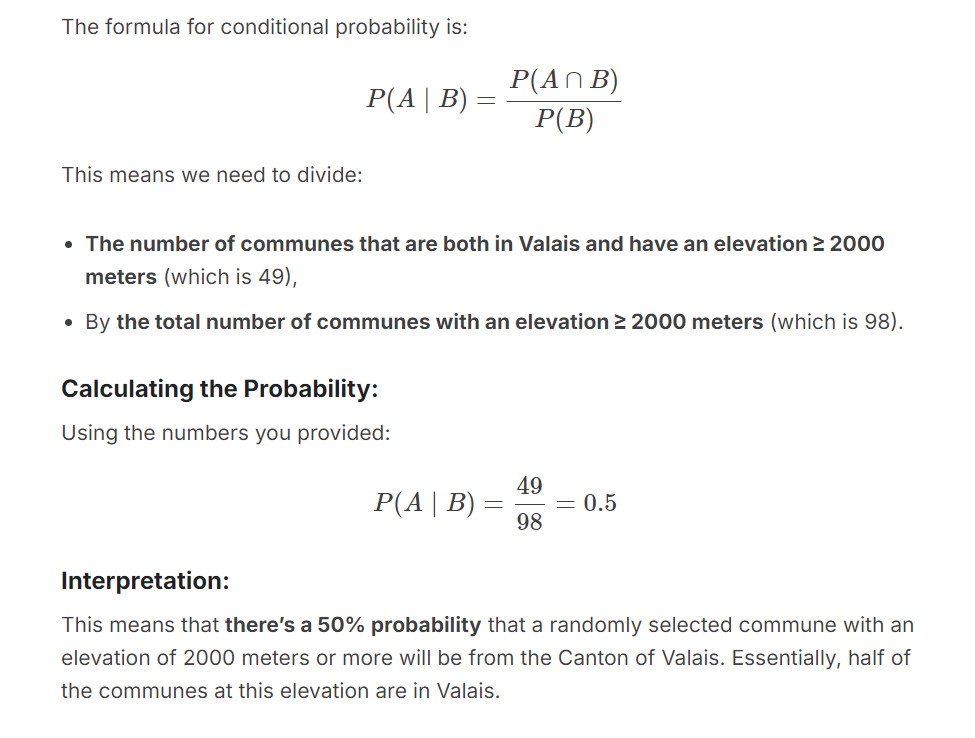

<h1 style="font-size:180%; color:orange;"><i><b>Matrices</b></i></h1>

Tip by Teacher Daniel Flores Agueda to apply Crosstab.

However, Crosstab  returned: NameError: name 'cleaned_df' is not defined

In [47]:
#Alternative approaches include:
#pd.crosstab(df2['Commune'], df2['Canton']), pd.get_dummies(cleaned_df.Canton) (cleaned_df[['Canton']].values == cleaned_df.Canton.unique()).astype(int)

#That returned NameError: name 'cleaned_df' is not defined

In [48]:
#Number of Communes

#https://saturncloud.io/blog/how-to-get-unique-values-in-multiple-columns-using-pandas/#:~:text=Getting%20Unique%20Values%20in%20Multiple%20Columns,-Now%20that%20we&text=We%20can%20use%20the%20drop_duplicates,Pandas%20DataFrame%20to%20achieve%20this.&text=The%20drop_duplicates()%20method%20removes,the%20Age%20and%20City%20columns.

unique_communes = df['Commune'].unique()

print(unique_communes)
len(unique_communes)

['Aeugst am Albis' 'Affoltern am Albis' 'Bonstetten' ... 'Clos du Doubs'
 'Haute-Ajoie' 'La Baroche']


2202

According to Wikipedia: "There are 2,131 municipalities as of January 2024."

In [49]:
#Switzerland has 26 Cantons

unique_cantons = df['Canton'].unique()

print(unique_cantons)
len(unique_cantons)

['ZH' 'BE' 'LU' 'UR' 'SZ' 'OW' 'NW' 'GL' 'ZG' 'FR' 'SO' 'BS' 'BL' 'SH'
 'AR' 'AI' 'SG' 'GR' 'AG' 'TG' 'TI' 'VD' 'VS' 'NE' 'GE' 'JU']


26

#E Matrices

Define a data frame matrix whose rows correspond to communes and the columns to the cantons. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the commune in row i is in the canton in column j and a 0 otherwise.

In [50]:
#https://www.kaggle.com/discussions/questions-and-answers/528667#2961796
#Answered by Metin Meki Abullrahman

#Define the number of rows and columns
rows = 2202
columns = 26

#Create a 2D array with 26 columns filled with zeros
zeros_array = np.zeros((rows,columns))

#Create a 2D array with 2202 rows filled with ones
ones_array = np.ones((rows, 1))

#Concatenate the arrays horizontally
matrix = np.hstack((ones_array, zeros_array))

#Convert to a DataFrame
df = pd.DataFrame(matrix)

#Display the DataFrame
print(df)

       0    1    2    3    4    5    6    7    8    9   ...   17   18   19  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2197  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2198  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2199  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2200  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2201  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       20   21   22   23   24   25   26  
0     0.0  0.0  0.0  

That's all for the First List of Tasks. Course Introduction to data analysis with Python. It was hard for a beginner to deal with so many snippets and having to deal with the data after each new indexation.

No pain, no gain. Das war's!